Dataset Preview:


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0



 Data Types:
job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

 Missing Values:


,Missing Count,Missing %
salary_range,15012,83.959732
department,11547,64.580537
required_education,8105,45.329978
benefits,7212,40.335570
required_experience,7050,39.429530
function,6455,36.101790
industry,4903,27.421700
employment_type,3471,19.412752
company_profile,3308,18.501119
requirements,2696,15.078300



 Class Distribution (0 = Real, 1 = Fake):


,Count,Percentage
fraudulent,,
0,17014,95.16%
1,866,4.84%



 Suggested Feature Groups:
Text Features: ['title', 'company_profile', 'description', 'requirements', 'benefits']
Categorical Features: ['industry', 'employment_type', 'location', 'function', 'department']
Binary Features: ['telecommuting', 'has_company_logo', 'has_questions']
Label: fraudulent


<ipython-input-3-dbd224cbdf71>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraudulent', data=df, palette='coolwarm')


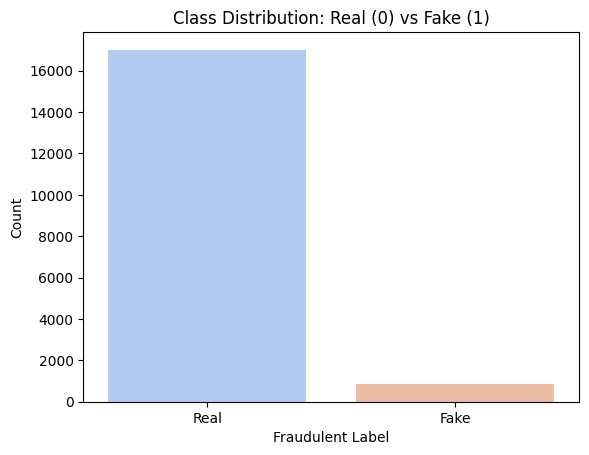

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)


df = pd.read_csv('/content/fake_job_postings.csv')

print("Dataset Preview:")
display(df.head())

print("\n Data Types:")
print(df.dtypes)

print("\n Missing Values:")
missing_info = df.isnull().sum()
missing_percent = (missing_info / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_info,
    'Missing %': missing_percent
})
display(missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing %', ascending=False))


print("\n Class Distribution (0 = Real, 1 = Fake):")
fraud_counts = df['fraudulent'].value_counts()
fraud_percent = fraud_counts / len(df) * 100
fraud_summary = pd.DataFrame({
    'Count': fraud_counts,
    'Percentage': fraud_percent.map("{:.2f}%".format)
})
display(fraud_summary)


text_cols = ['title', 'company_profile', 'description', 'requirements', 'benefits']
cat_cols = ['industry', 'employment_type', 'location', 'function', 'department']
bin_cols = ['telecommuting', 'has_company_logo', 'has_questions']
label_col = 'fraudulent'

print("\n Suggested Feature Groups:")
print(f"Text Features: {text_cols}")
print(f"Categorical Features: {cat_cols}")
print(f"Binary Features: {bin_cols}")
print(f"Label: {label_col}")


sns.countplot(x='fraudulent', data=df, palette='coolwarm')
plt.title("Class Distribution: Real (0) vs Fake (1)")
plt.xlabel("Fraudulent Label")
plt.ylabel("Count")
plt.xticks([0,1], ['Real', 'Fake'])
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


df = pd.read_csv('/content/fake_job_postings.csv')


text_cols = ['description', 'requirements', 'company_profile']
df[text_cols] = df[text_cols].fillna('')


cat_cols = [
    'industry', 'employment_type', 'location',
    'department', 'function', 'required_experience', 'required_education'
]
df[cat_cols] = df[cat_cols].fillna('Unknown')


label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))
scaler = StandardScaler()
df[['description_length']] = scaler.fit_transform(df[['description_length']])


X = df.drop(columns=['fraudulent', 'job_id'])
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set:  {X_test.shape}, {y_test.shape}")

Training Set: (14304, 17), (14304,)
Testing Set:  (3576, 17), (3576,)


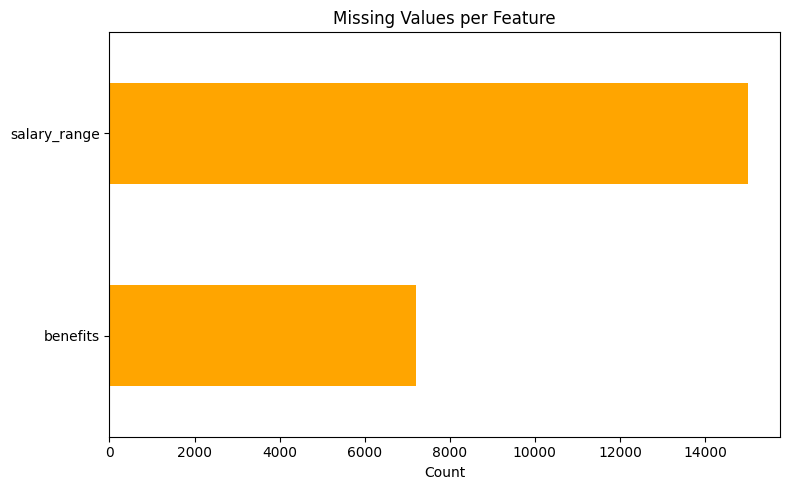

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

missing.plot(kind='barh', figsize=(8,5), color='orange')
plt.title("Missing Values per Feature")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
import joblib


tfidf_desc = TfidfVectorizer(max_features=300, stop_words='english')
tfidf_req = TfidfVectorizer(max_features=300, stop_words='english')
tfidf_profile = TfidfVectorizer(max_features=300, stop_words='english')

X_train_desc = tfidf_desc.fit_transform(X_train['description'])
X_test_desc = tfidf_desc.transform(X_test['description'])

X_train_req = tfidf_req.fit_transform(X_train['requirements'])
X_test_req = tfidf_req.transform(X_test['requirements'])

X_train_profile = tfidf_profile.fit_transform(X_train['company_profile'])
X_test_profile = tfidf_profile.transform(X_test['company_profile'])


X_train_final = hstack([X_train_desc, X_train_req, X_train_profile])
X_test_final = hstack([X_test_desc, X_test_req, X_test_profile])


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_final, y_train)
joblib.dump(model, 'best_random_forest_model.pkl')

print(f"Final Train Feature Shape: {X_train_final.shape}")
print(f"Final Test Feature Shape:  {X_test_final.shape}")


Final Train Feature Shape: (14304, 900)
Final Test Feature Shape:  (3576, 900)


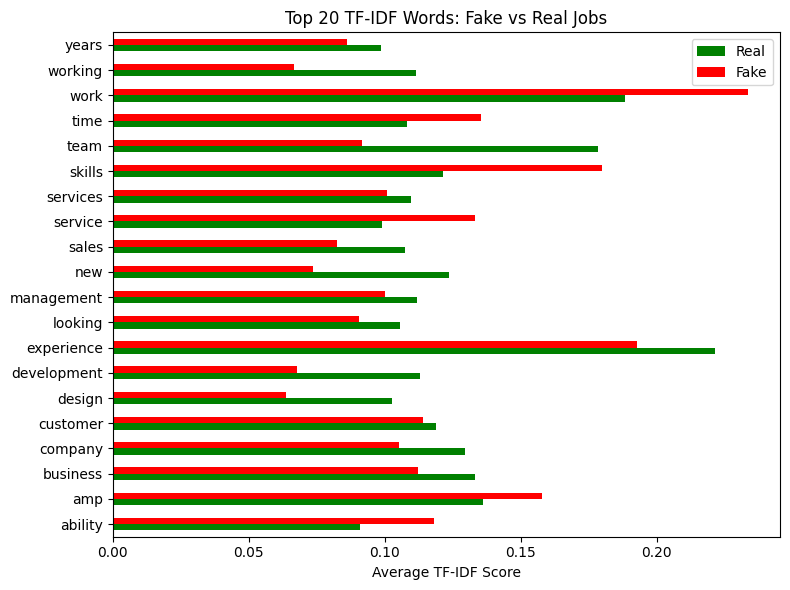

In [ ]:
df['all_text'] = df['description'].fillna('') + ' ' + df['requirements'].fillna('') + ' ' + df['company_profile'].fillna('')

tfidf = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['all_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df['fraudulent'] = df['fraudulent'].values

avg_fake = tfidf_df[tfidf_df['fraudulent'] == 1].drop('fraudulent', axis=1).mean()
avg_real = tfidf_df[tfidf_df['fraudulent'] == 0].drop('fraudulent', axis=1).mean()

df_plot = pd.DataFrame({'Real': avg_real, 'Fake': avg_fake})
df_plot.plot(kind='barh', figsize=(8, 6), color=['green', 'red'])
plt.title("Top 20 TF-IDF Words: Fake vs Real Jobs")
plt.xlabel("Average TF-IDF Score")
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(random_state=42)


X_train_dense = X_train_final.toarray()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_dense, y_train)


print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 13611, 1: 693})
After SMOTE: Counter({0: 13611, 1: 13611})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)


scale_pos_weight = sum(y_train_resampled == 0) / sum(y_train_resampled == 1)


models = {
    "Logistic Regression": LogisticRegression(
        solver='liblinear', max_iter=1000, random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, random_state=42
    ),
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        objective='binary:logistic',
        max_depth=4,
        learning_rate=0.1,
        n_estimators=500,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=1.0,
        early_stopping_rounds=10,
        random_state=42
    )
}


for name, model in models.items():
    print(f"\n Model: {name}")


    if name == "XGBoost":
        model.fit(
            X_train_resampled, y_train_resampled,
            eval_set=[(X_test_final, y_test)],
            verbose=False
        )
    else:
        model.fit(X_train_resampled, y_train_resampled)


    y_pred = model.predict(X_test_final)
    y_prob = model.predict_proba(X_test_final)[:, 1]


    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)


    print(f" Accuracy:  {acc:.4f}")
    print(f" Precision: {prec:.4f}")
    print(f" Recall:    {rec:.4f}")
    print(f" F1-score:  {f1:.4f}")
    print(f" AUC-ROC:   {auc:.4f}")
    print(" Confusion Matrix:")
    print(cm)



 Model: Logistic Regression
 Accuracy:  0.9491
 Precision: 0.4856
 Recall:    0.8786
 F1-score:  0.6255
 AUC-ROC:   0.9765
 Confusion Matrix:
[[3242  161]
 [  21  152]]

 Model: Decision Tree
 Accuracy:  0.9625
 Precision: 0.5915
 Recall:    0.7283
 F1-score:  0.6528
 AUC-ROC:   0.8514
 Confusion Matrix:
[[3316   87]
 [  47  126]]

 Model: Random Forest
 Accuracy:  0.9793
 Precision: 0.8613
 Recall:    0.6821
 F1-score:  0.7613
 AUC-ROC:   0.9880
 Confusion Matrix:
[[3384   19]
 [  55  118]]

 Model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:42:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Accuracy:  0.0503
 Precision: 0.0485
 Recall:    1.0000
 F1-score:  0.0925
 AUC-ROC:   0.5194
 Confusion Matrix:
[[   7 3396]
 [   0  173]]


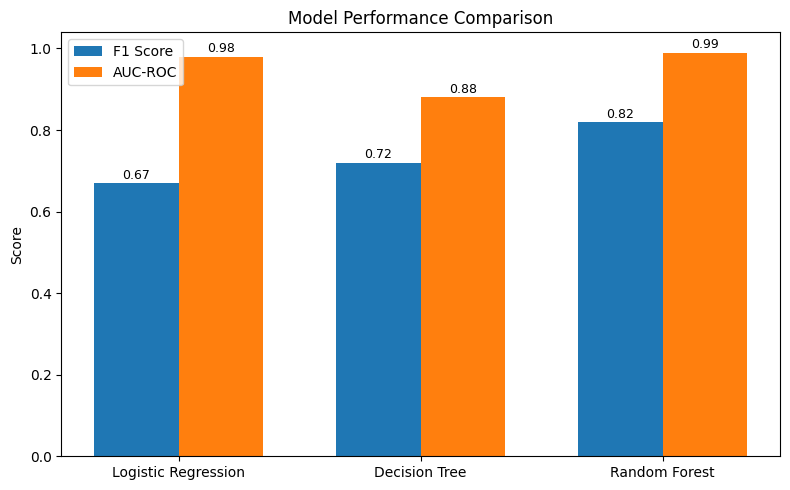

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
f1_scores = [0.67, 0.72, 0.82]
auc_scores = [0.98, 0.88, 0.99]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, f1_scores, width, label='F1 Score')
bars2 = ax.bar(x + width/2, auc_scores, width, label='AUC-ROC')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}


rf = RandomForestClassifier(random_state=42)


random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train_resampled, y_train_resampled)


best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_final)
y_prob = best_rf.predict_proba(X_test_final)[:, 1]


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

print(f"\n Best Params: {random_search.best_params_}")
print(f" F1 Score on Test Set: {f1_score(y_test, y_pred):.4f}")
print(f" AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20}
 F1 Score on Test Set: 0.5132
 AUC-ROC: 0.9770
 Confusion Matrix:
[[3124  279]
 [  17  156]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3403
           1       0.36      0.90      0.51       173

    accuracy                           0.92      3576
   macro avg       0.68      0.91      0.73      3576
weighted avg       0.96      0.92      0.93      3576



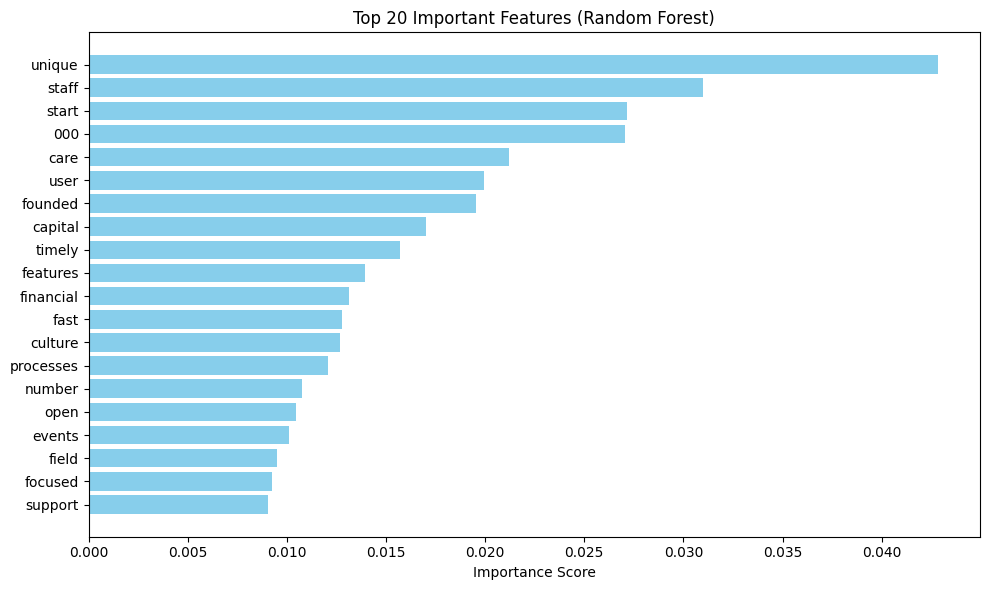

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


structured_feature_names = X_train_structured.columns.tolist()
tfidf_feature_names = (
    tfidf_desc.get_feature_names_out().tolist() +
    tfidf_req.get_feature_names_out().tolist() +
    tfidf_profile.get_feature_names_out().tolist()
)


final_feature_names = structured_feature_names + tfidf_feature_names


importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]


top_n = 20
top_features = [(final_feature_names[i], importances[i]) for i in indices[:top_n]]


feat_names, feat_scores = zip(*top_features)
plt.figure(figsize=(10, 6))
plt.barh(feat_names[::-1], feat_scores[::-1], color='skyblue')
plt.title("Top 20 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [ ]:
import joblib


joblib.dump(best_rf, 'best_random_forest_model.pkl')


joblib.dump(tfidf_desc, 'tfidf_vectorizer_description.pkl')
joblib.dump(tfidf_req, 'tfidf_vectorizer_requirements.pkl')
joblib.dump(tfidf_profile, 'tfidf_vectorizer_profile.pkl')

['tfidf_vectorizer_profile.pkl']

In [ ]:

y_pred = best_rf.predict(X_test_final)
y_prob = best_rf.predict_proba(X_test_final)[:, 1]


pred_df = pd.DataFrame({
    'prediction': y_pred,
    'probability': y_prob,
    'actual': y_test.reset_index(drop=True)
})


pred_df.to_csv('rf_predictions_testset.csv', index=False)

In [ ]:
import joblib

joblib.dump(best_rf, 'best_random_forest_model.pkl')
joblib.dump(tfidf_desc, 'tfidf_vectorizer_description.pkl')
joblib.dump(tfidf_req, 'tfidf_vectorizer_requirements.pkl')
joblib.dump(tfidf_profile, 'tfidf_vectorizer_profile.pkl')


['tfidf_vectorizer_profile.pkl']

In [ ]:
from google.colab import files
files.download('best_random_forest_model.pkl')
files.download('tfidf_vectorizer_description.pkl')
files.download('tfidf_vectorizer_requirements.pkl')
files.download('tfidf_vectorizer_profile.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>